In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Load

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission_df = pd.read_csv("./data/sample_submission.csv")

train_df.shape, test_df.shape, submission_df.shape

((26457, 20), (10000, 19), (10000, 4))

In [4]:
train_df.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


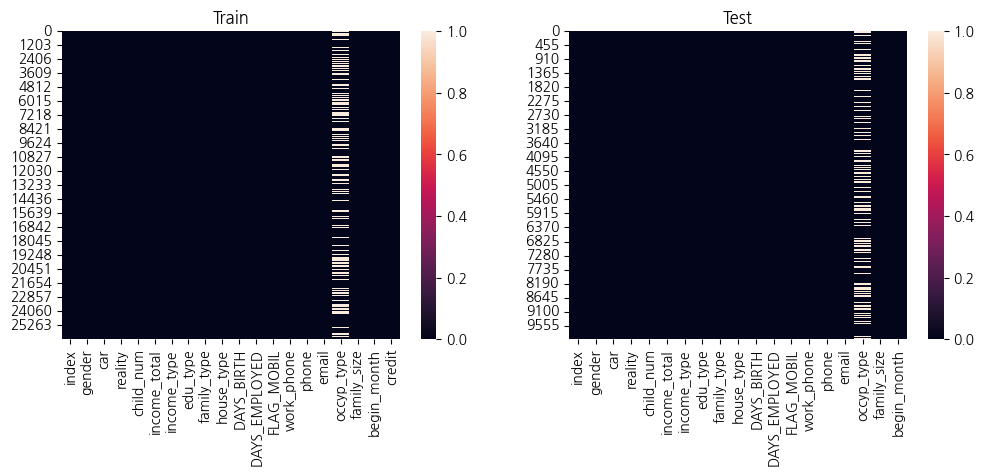

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.heatmap(train_df.isnull(), ax=ax[0]).set_title("Train")
sns.heatmap(test_df.isnull(), ax=ax[1]).set_title("Test")
plt.show()

In [6]:
def info(df):
    info = pd.concat([pd.DataFrame(df.dtypes).T, pd.DataFrame(df.isnull().sum()).T, pd.DataFrame(df.isnull().mean()*100).T], axis=0)
    info.index=[["type", "nullcnt", "null%"]]
    display(info)

In [7]:
info(train_df)
info(test_df)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
type,int64,object,object,object,int64,float64,object,object,object,object,int64,int64,int64,int64,int64,int64,object,float64,float64,float64
nullcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8171,0,0,0
null%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.884076,0.0,0.0,0.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
type,int64,object,object,object,int64,float64,object,object,object,object,int64,int64,int64,int64,int64,int64,object,float64,float64
nullcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3152,0,0
null%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.52,0.0,0.0


In [8]:
numeric_ftr = train_df.dtypes[train_df.dtypes!="object"].index.tolist()
object_ftr = train_df.dtypes[train_df.dtypes=="object"].index.tolist()

# EDA

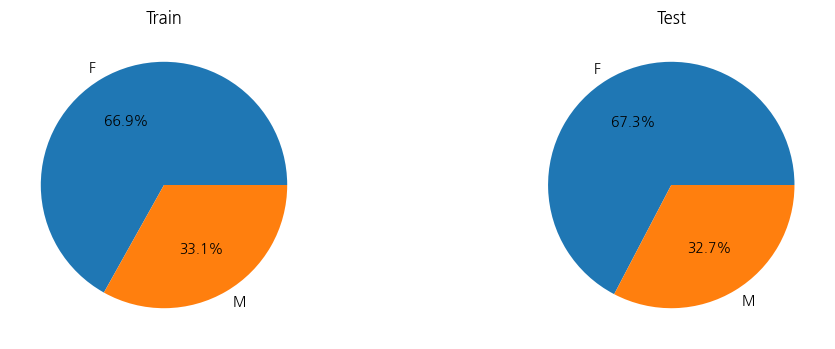

In [9]:
# gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for_pie = train_df.groupby("gender").count()["index"]
ax[0].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[0].set_title("Train")
for_pie = test_df.groupby("gender").count()["index"]
ax[1].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[1].set_title("Test")
plt.show()

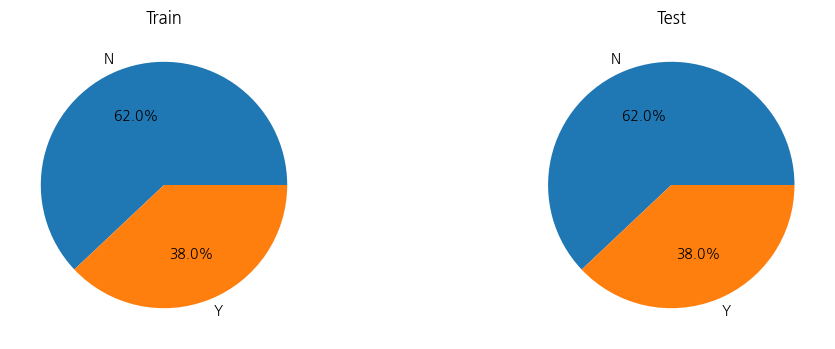

In [10]:
# car
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for_pie = train_df.groupby("car").count()["index"]
ax[0].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[0].set_title("Train")
for_pie = test_df.groupby("car").count()["index"]
ax[1].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[1].set_title("Test")
plt.show()

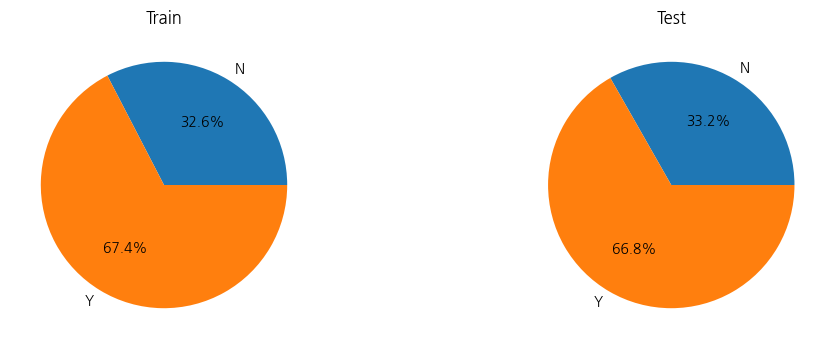

In [11]:
# reality
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for_pie = train_df.groupby("reality").count()["index"]
ax[0].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[0].set_title("Train")
for_pie = test_df.groupby("reality").count()["index"]
ax[1].pie(for_pie, labels=for_pie.index, autopct="%1.1f%%")
ax[1].set_title("Test")
plt.show()

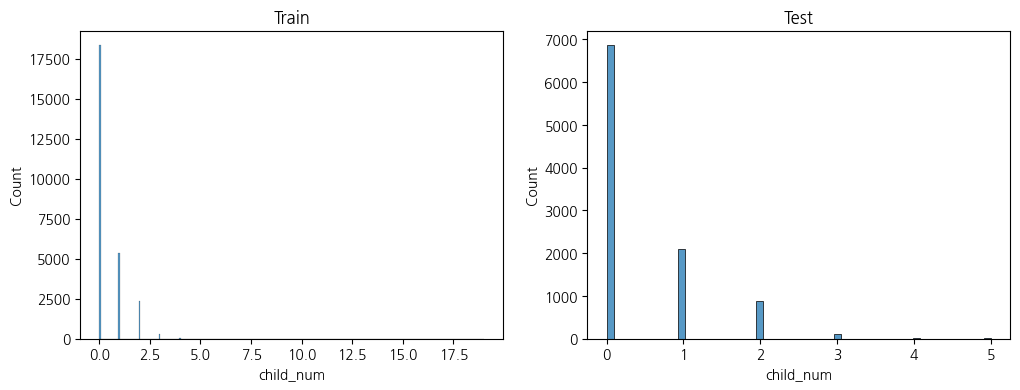

In [12]:
# child_num
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df, x="child_num", ax=ax[0]).set_title("Train")
sns.histplot(data=test_df, x="child_num", ax=ax[1]).set_title("Test")
plt.show()

In [13]:
train_df["child_num"] = train_df["child_num"].apply(lambda x: 5 if x>4 else x)
test_df["chiild_num"] = test_df["child_num"].apply(lambda x: 5 if x>4 else x)

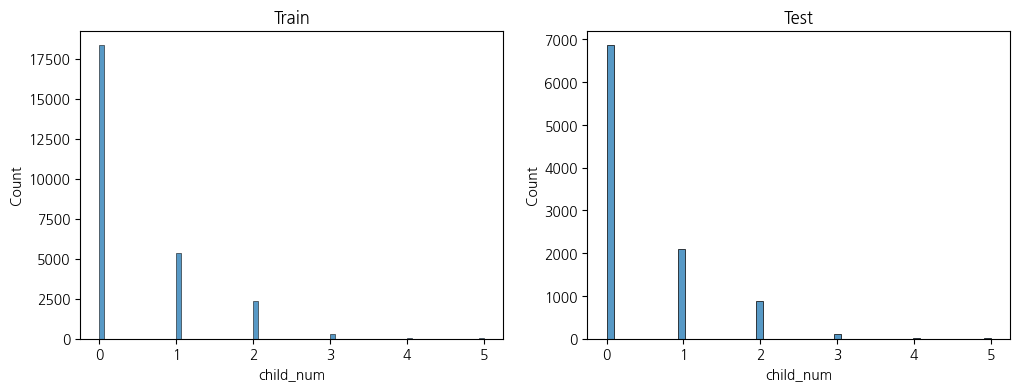

In [14]:
# child_num
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df, x="child_num", ax=ax[0]).set_title("Train")
sns.histplot(data=test_df, x="child_num", ax=ax[1]).set_title("Test")
plt.show()

27000.0 1575000.0 187306.52449257285
27000.0 1575000.0 185043.3183


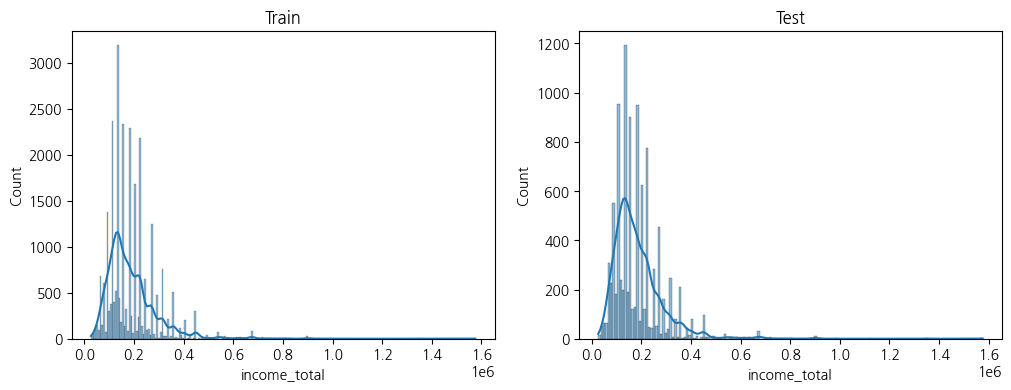

In [15]:
# income_total
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df, x="income_total", kde=True, ax=ax[0]).set_title("Train")
sns.histplot(data=test_df, x="income_total", kde=True, ax=ax[1]).set_title("Test")
print(train_df["income_total"].min(), train_df["income_total"].max(), train_df["income_total"].mean())
print(test_df["income_total"].min(), test_df["income_total"].max(), test_df["income_total"].mean())
plt.show()

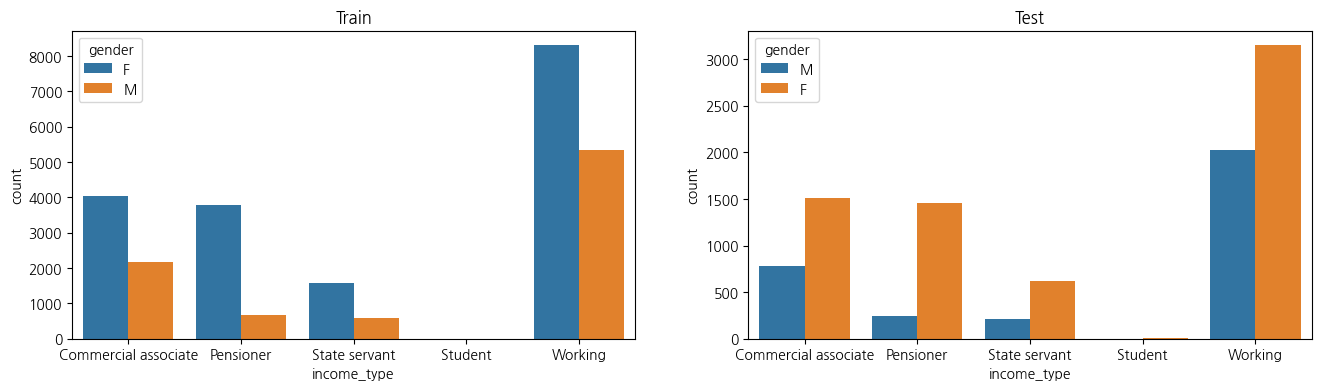

In [18]:
# income_type
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.countplot(data=train_df.sort_values("income_type"), x="income_type", hue="gender", ax=ax[0]).set_title("Train")
sns.countplot(data=test_df.sort_values("income_type"), x="income_type", hue="gender", ax=ax[1]).set_title("Test")
plt.show()

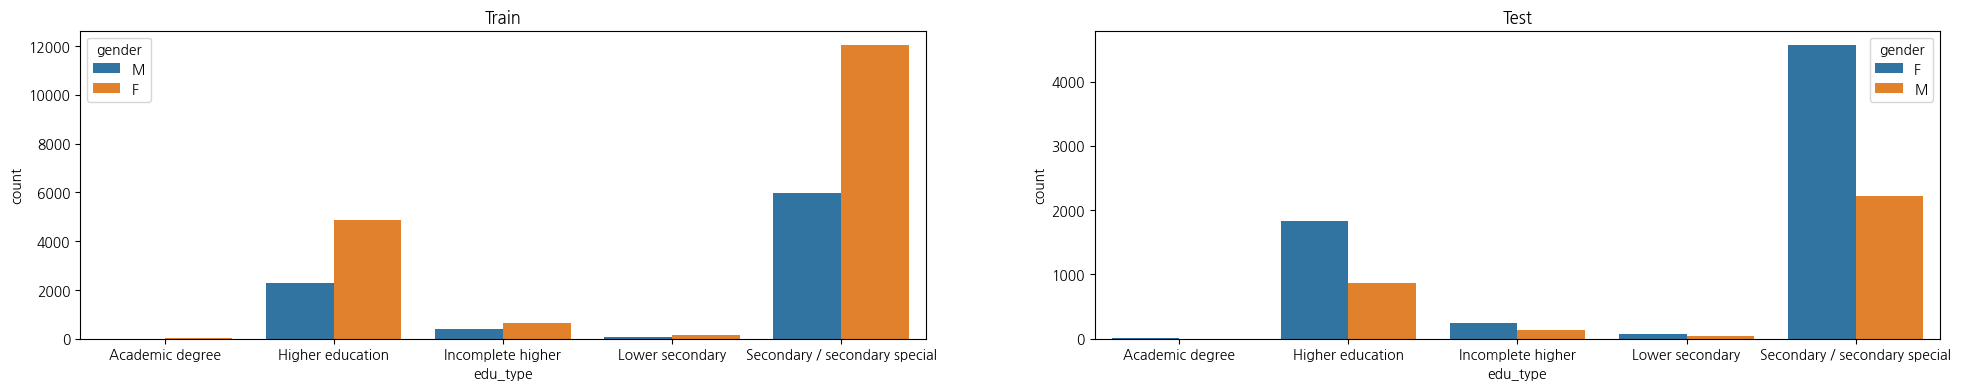

In [20]:
# edu_type
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 4))
sns.countplot(data=train_df.sort_values("edu_type"), x="edu_type", hue="gender", ax=ax[0]).set_title("Train")
sns.countplot(data=test_df.sort_values("edu_type"), x="edu_type", hue="gender", ax=ax[1]).set_title("Test")
plt.show()

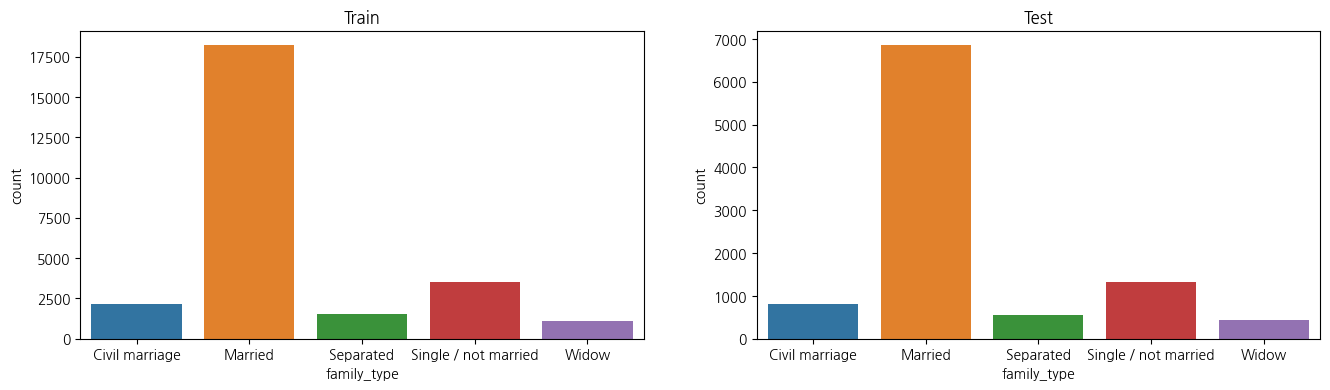

In [24]:
# family_type
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.countplot(data=train_df.sort_values("family_type"), x="family_type", ax=ax[0]).set_title("Train")
sns.countplot(data=test_df.sort_values("family_type"), x="family_type", ax=ax[1]).set_title("Test")
plt.show()

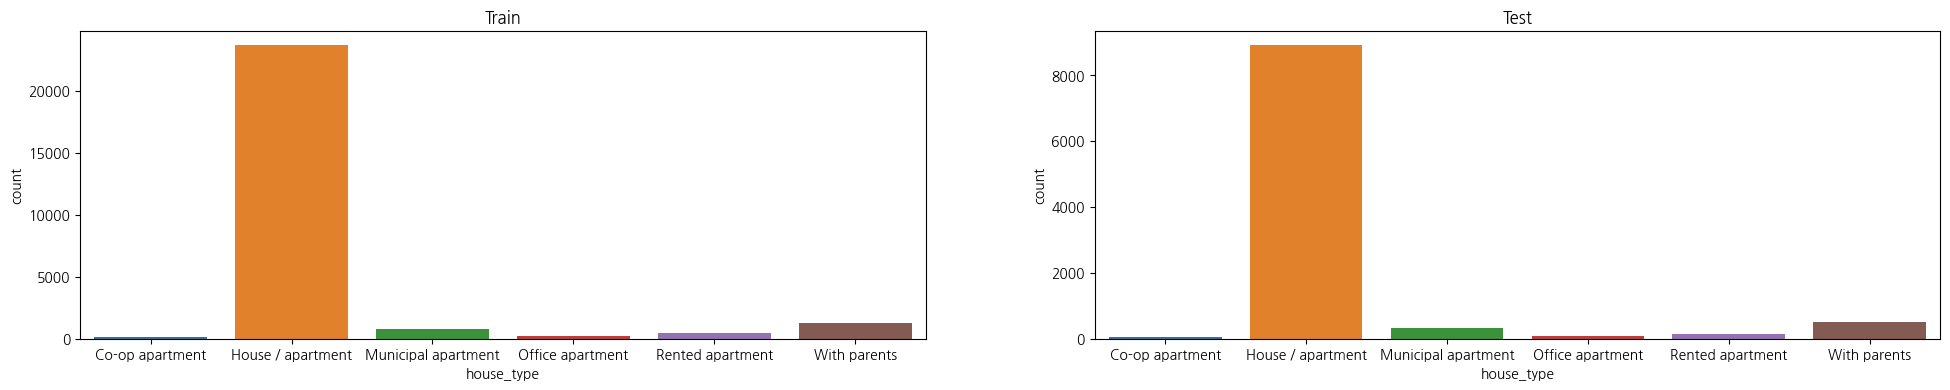

In [26]:
# house_type
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 4))
sns.countplot(data=train_df.sort_values("house_type"), x="house_type", ax=ax[0]).set_title("Train")
sns.countplot(data=test_df.sort_values("house_type"), x="house_type", ax=ax[1]).set_title("Test")
plt.show()

In [32]:
# DAYS_BIRTH -> age
train_df["age"] = train_df["DAYS_BIRTH"].apply(lambda x: abs(x)//365)
test_df["age"] = test_df["DAYS_BIRTH"].apply(lambda x: abs(x)//365)

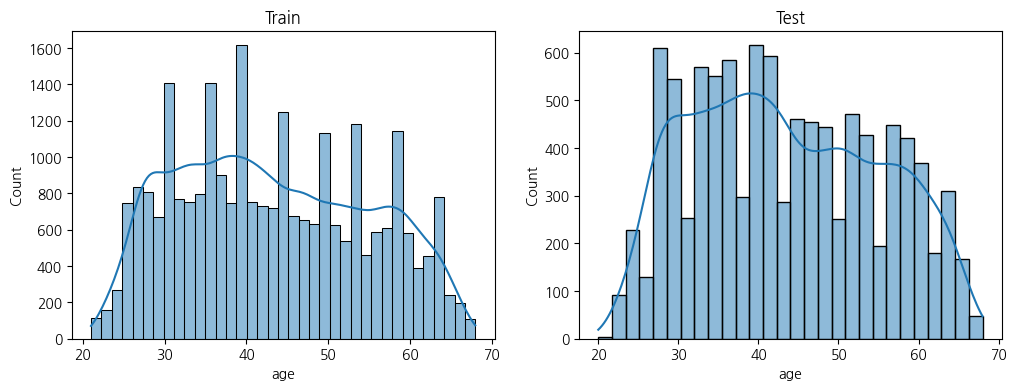

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df, x="age", kde=True, ax=ax[0]).set_title("Train")
sns.histplot(data=test_df, x="age", kde=True, ax=ax[1]).set_title("Test")
plt.show()

In [39]:
# DAYS_EMPLOYED -> working
train_df["working"] = train_df["DAYS_EMPLOYED"].apply(lambda x: abs(x)//365)
test_df["working"] = test_df["DAYS_EMPLOYED"].apply(lambda x: abs(x)//365)

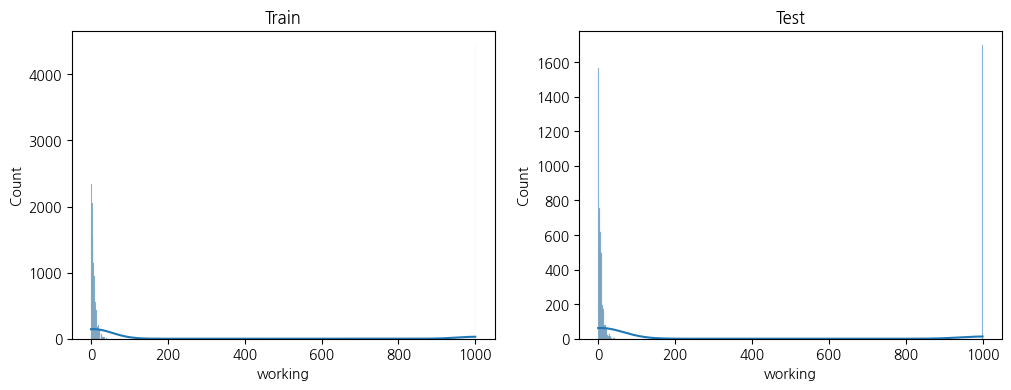

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df, x="working", kde=True, ax=ax[0]).set_title("Train")
sns.histplot(data=test_df, x="working", kde=True, ax=ax[1]).set_title("Test")
plt.show()

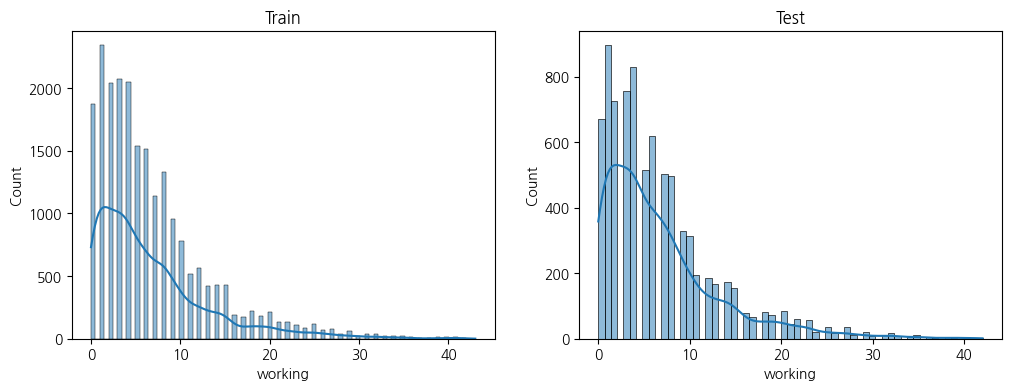

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=train_df[train_df["working"]<1000], x="working", kde=True, ax=ax[0]).set_title("Train")
sns.histplot(data=test_df[test_df["working"]<1000], x="working", kde=True, ax=ax[1]).set_title("Test")
plt.show()

In [41]:
train_df.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
